In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ta
import numpy as np
import datetime
import seaborn as sns

In [4]:
df = pd.read_csv('BTC-USDT.csv')
df

,date,open,high,low,close,volume
0,1502942400000,4261.48,4313.62,4261.32,4308.83,47.181009
1,1502946000000,4308.83,4328.69,4291.37,4315.32,23.234916
2,1502949600000,4330.29,4345.45,4309.37,4324.35,7.229691
3,1502953200000,4316.62,4349.99,4287.41,4349.99,4.443249
4,1502956800000,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
65712,1739966400000,96422.60,96495.00,96138.40,96166.44,530.931870
65713,1739970000000,96166.45,96481.60,96166.44,96277.54,657.875400
65714,1739973600000,96277.54,96700.00,95692.00,95766.33,1149.734600
65715,1739977200000,95766.33,96405.45,95536.36,95943.74,1211.599660


In [5]:
df["date_format"] = pd.to_datetime(df["date"], unit='ms')
#df

In [6]:
df["year"] = df["date_format"].dt.year
df["month_name"] = df["date_format"].dt.month_name()
df["month"] = df["date_format"].dt.month - 1
df["day"] = df["date_format"].dt.day_of_week
df["hour"] = df["date_format"].dt.hour
#df

In [7]:
df["usd_volume"] = df["volume"] * df["close"]
df["return"] = df["close"] - df["open"]
df["return_pct"] = ((df["close"] - df["open"]) / df["open"]) * 100
df["volatility"] = df["high"] - df["low"]
df["volatility_pct"] = ((df["high"] - df["low"]) / df["low"]) * 100

df["return"] = df["close"] - df["open"]
df["return_pct"] = ((df["close"] - df["open"]) / df["open"]) * 100
df["NYSE_open"] = False
df.loc[(df["hour"] >= 14) & (df["hour"] <= 20), "NYSE_open"] = True
print((df["NYSE_open"] == True).sum())
df

19186


,date,open,high,low,close,volume,date_format,year,month_name,month,day,hour,usd_volume,return,return_pct,volatility,volatility_pct,NYSE_open
0,1502942400000,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-17 04:00:00,2017,August,7,3,4,2.032949e+05,47.35,1.111116,52.30,1.227319,False
1,1502946000000,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 05:00:00,2017,August,7,3,5,1.002661e+05,6.49,0.150621,37.32,0.869652,False
2,1502949600000,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 06:00:00,2017,August,7,3,6,3.126371e+04,-5.94,-0.137173,36.08,0.837245,False
3,1502953200000,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 07:00:00,2017,August,7,3,7,1.932809e+04,33.37,0.773059,62.58,1.459622,False
4,1502956800000,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 08:00:00,2017,August,7,3,8,4.242110e+03,27.37,0.631617,44.53,1.027619,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65712,1739966400000,96422.60,96495.00,96138.40,96166.44,530.931870,2025-02-19 12:00:00,2025,February,1,2,12,5.105783e+07,-256.16,-0.265664,356.60,0.370924,False
65713,1739970000000,96166.45,96481.60,96166.44,96277.54,657.875400,2025-02-19 13:00:00,2025,February,1,2,13,6.333863e+07,111.09,0.115518,315.16,0.327723,False
65714,1739973600000,96277.54,96700.00,95692.00,95766.33,1149.734600,2025-02-19 14:00:00,2025,February,1,2,14,1.101059e+08,-511.21,-0.530975,1008.00,1.053380,True
65715,1739977200000,95766.33,96405.45,95536.36,95943.74,1211.599660,2025-02-19 15:00:00,2025,February,1,2,15,1.162454e+08,177.41,0.185253,869.09,0.909696,True


In [8]:
grouper = "hour"
analyser = "return_pct"
dt = pd.DataFrame(df.loc[df["NYSE_open"] == True].groupby(grouper)[analyser].mean().sort_index())
dt

,return_pct
hour,
14,-0.012621
15,0.026928
16,0.006090
17,-0.006898
18,0.013359
19,0.021296
20,0.005777


C:\Users\antoi\AppData\Local\Temp\ipykernel_35780\513497294.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(ax=ax_left, data=dt, x='index_text',y=analyser, palette=custom_palette)


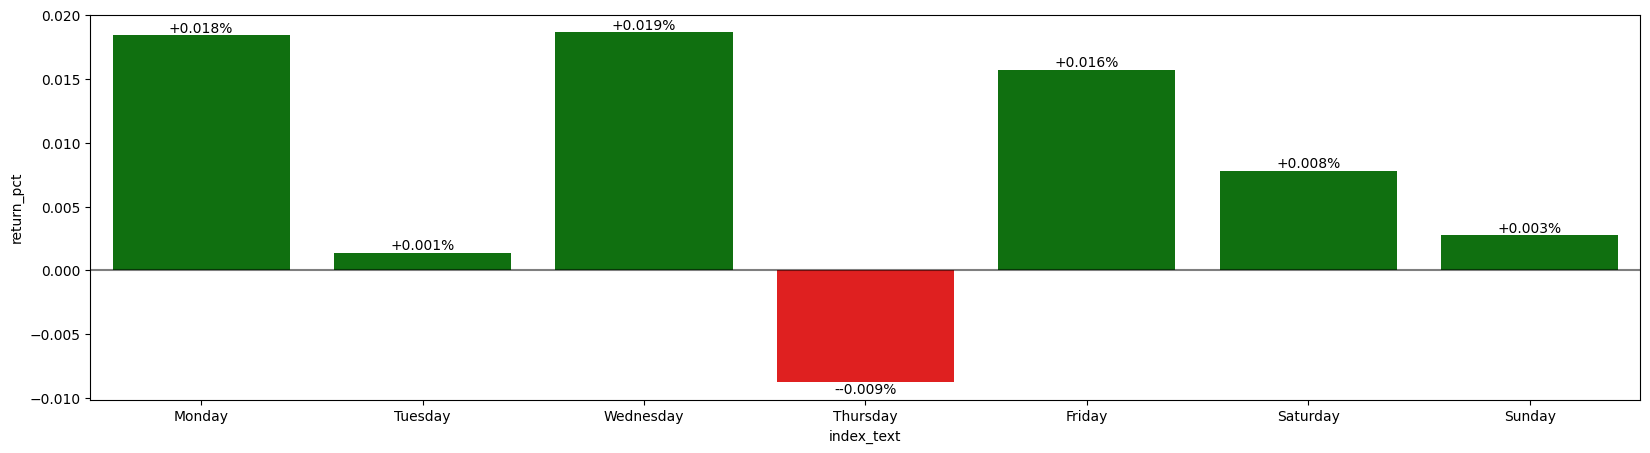

In [9]:
grouper = "day"
analyser = "return_pct"

dt = pd.DataFrame(df.groupby(grouper)[analyser].mean().sort_index())
dt["index_text"] = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# dt["index_text"] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# dt["index_text"] = ["0h","1h","2h","3h","4h","5h","6h","7h","8h","9h","10h","11h","12h","13h","14h","15h","16h","17h","18h","19h","20h","21h","22h","23h"]

fig, ax_left = plt.subplots(figsize=(20, 5))
custom_palette = {}
for index, row in dt.iterrows():
    if row[analyser] >= 0:
        custom_palette[row["index_text"]] = 'g'
    else:
        custom_palette[row["index_text"]] = 'r'
g = sns.barplot(ax=ax_left, data=dt, x='index_text',y=analyser, palette=custom_palette)
for index, row in dt.iterrows():
    if row[analyser] >= 0:
        g.text(row.name, row[analyser], '+'+str(round(row[analyser], 3))+'%', color='black', ha="center", va="bottom")
    else:
        g.text(row.name, row[analyser], '-'+str(round(row[analyser], 3))+'%', color='black', ha="center", va="top")
ax_left.axhline(y=0, color='black', alpha=0.5)
plt.show()

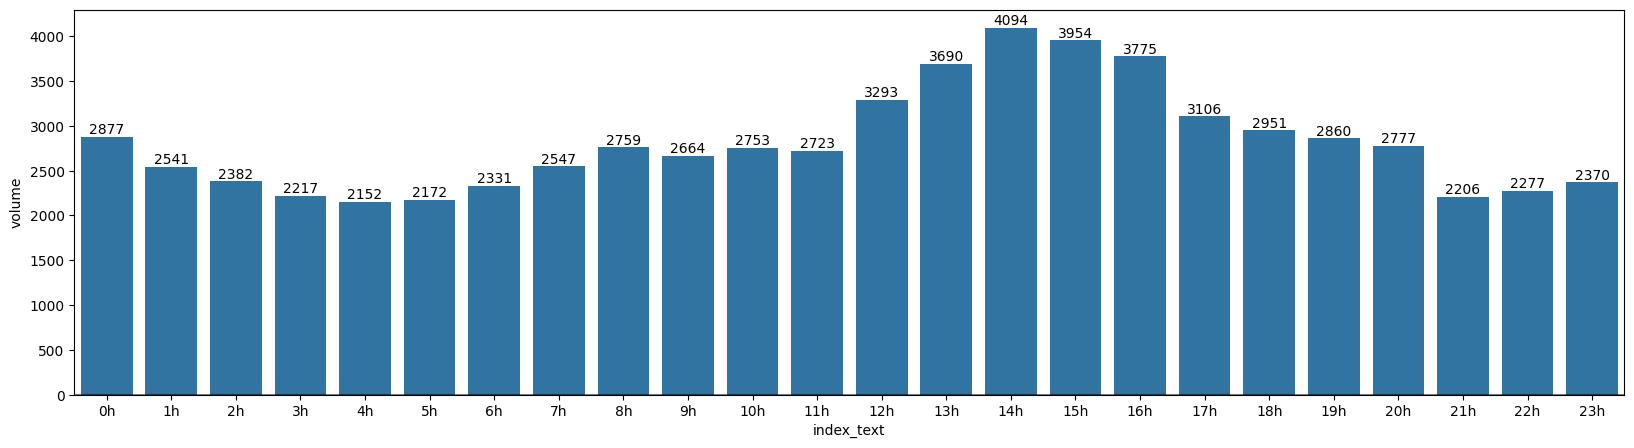

In [13]:
grouper = "hour"
analyser = "volume"

dt = pd.DataFrame(df.groupby(grouper)[analyser].mean().sort_index())
#dt["index_text"] = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# dt["index_text"] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dt["index_text"] = ["0h","1h","2h","3h","4h","5h","6h","7h","8h","9h","10h","11h","12h","13h","14h","15h","16h","17h","18h","19h","20h","21h","22h","23h"]

fig, ax_left = plt.subplots(figsize=(20, 5))

g = sns.barplot(ax=ax_left, data=dt, x='index_text',y=analyser)

for index, row in dt.iterrows():
    g.text(row.name, row[analyser], str(round(row[analyser])), color='black', ha="center", va="bottom")

ax_left.axhline(y=0, color='black', alpha=0.5)
plt.show()

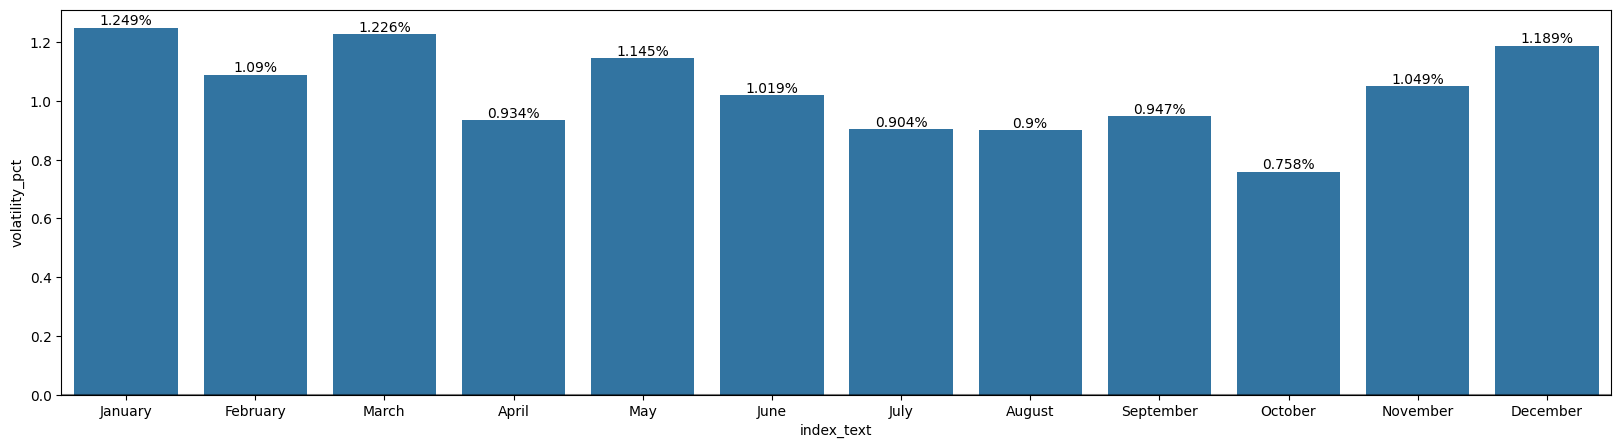

In [11]:
grouper = "month"
analyser = "volatility_pct"

dt = pd.DataFrame(df.groupby(grouper)[analyser].mean().sort_index())
#dt["index_text"] = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dt["index_text"] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#dt["index_text"] = ["0h","1h","2h","3h","4h","5h","6h","7h","8h","9h","10h","11h","12h","13h","14h","15h","16h","17h","18h","19h","20h","21h","22h","23h"]

fig, ax_left = plt.subplots(figsize=(20, 5))

g = sns.barplot(ax=ax_left, data=dt, x='index_text',y=analyser)

for index, row in dt.iterrows():
    g.text(row.name, row[analyser], str(round(row[analyser],3))+ '%', color='black', ha="center", va="bottom")

ax_left.axhline(y=0, color='black', alpha=0.5)
plt.show()